In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

# Examples of a dataframe with an index of type DatetimeIndex

## From a DataFrame with a datetime column filter the first or last rows in an interval

In [2]:
rng = pd.date_range('2018-01-01', periods=720, freq='30min')
rng

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:30:00',
               '2018-01-01 01:00:00', '2018-01-01 01:30:00',
               '2018-01-01 02:00:00', '2018-01-01 02:30:00',
               '2018-01-01 03:00:00', '2018-01-01 03:30:00',
               '2018-01-01 04:00:00', '2018-01-01 04:30:00',
               ...
               '2018-01-15 19:00:00', '2018-01-15 19:30:00',
               '2018-01-15 20:00:00', '2018-01-15 20:30:00',
               '2018-01-15 21:00:00', '2018-01-15 21:30:00',
               '2018-01-15 22:00:00', '2018-01-15 22:30:00',
               '2018-01-15 23:00:00', '2018-01-15 23:30:00'],
              dtype='datetime64[ns]', length=720, freq='30T')

### column 'a' has a constant integer value

In [3]:
df = pd.DataFrame(3, index=rng, columns=['a'])
df.head()

,a
2018-01-01 00:00:00,3
2018-01-01 00:30:00,3
2018-01-01 01:00:00,3
2018-01-01 01:30:00,3
2018-01-01 02:00:00,3


### only use the first record of chunks of 3 hours

with numerics you can use mean(), max(), min() etc

In [4]:
df.resample('3H').mean().head()

,a
2018-01-01 00:00:00,3
2018-01-01 03:00:00,3
2018-01-01 06:00:00,3
2018-01-01 09:00:00,3
2018-01-01 12:00:00,3


### now create a similar datafram, with multiple random values for 'a'

In [5]:
df = pd.DataFrame(np.random.choice(['A', 'B'], len(rng)), index=rng, columns=['a'])
df.head()

,a
2018-01-01 00:00:00,B
2018-01-01 00:30:00,A
2018-01-01 01:00:00,A
2018-01-01 01:30:00,B
2018-01-01 02:00:00,B


### with strings use pad(), this does not do anything with the string value

In [6]:
df.resample('2H').pad().head()

,a
2018-01-01 00:00:00,B
2018-01-01 02:00:00,B
2018-01-01 04:00:00,A
2018-01-01 06:00:00,B
2018-01-01 08:00:00,A


### mulitple columns still okay

In [7]:
df = pd.DataFrame(np.random.choice(['A', 'B', 'C'], size=(len(rng), 2)), index=rng, columns=['a', 'b']) 
df.head()

,a,b
2018-01-01 00:00:00,B,B
2018-01-01 00:30:00,C,C
2018-01-01 01:00:00,C,C
2018-01-01 01:30:00,B,B
2018-01-01 02:00:00,B,C


In [8]:
df.resample('2H').pad().head()

,a,b
2018-01-01 00:00:00,B,B
2018-01-01 02:00:00,B,C
2018-01-01 04:00:00,C,C
2018-01-01 06:00:00,A,C
2018-01-01 08:00:00,C,A


## Counting in a resampled dataframe

In [9]:
rng = pd.date_range('2018-01-01', end='2018-12-31', freq='D')
rng[:5]

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

In [10]:
data = {'contestant' :  np.random.choice(['A', 'B', 'C'], len(rng)), 'score' :  np.random.choice(range(1, 6), len(rng))}
df = pd.DataFrame(data, index=rng)
df.head()

,contestant,score
2018-01-01,B,4
2018-01-02,A,3
2018-01-03,A,2
2018-01-04,B,3
2018-01-05,A,3


In [11]:
len(df)

365

### count number of scores per period

In [12]:
df.resample('M').apply({'score': 'count'}).head()

,score
2018-01-31,31
2018-02-28,28
2018-03-31,31
2018-04-30,30
2018-05-31,31


### mean score per period

In [13]:
df.resample('M').apply({'score': 'mean'}).head()

,score
2018-01-31,2.741935
2018-02-28,3.285714
2018-03-31,2.806452
2018-04-30,3.533333
2018-05-31,3.451613


### mean of scores per contestant per period 

In [14]:
result_df = df.groupby(['contestant']).resample('Q').mean()
result_df.head()

score
contestant                     
A          2018-03-31  3.103448
           2018-06-30  3.451613
           2018-09-30  3.410256
           2018-12-31  2.857143
B          2018-03-31  2.857143

### we now have a MultiIndex of two levels, contestant and period (unnamed)

In [15]:
result_df.index

MultiIndex(levels=[['A', 'B', 'C'], [2018-03-31 00:00:00, 2018-06-30 00:00:00, 2018-09-30 00:00:00, 2018-12-31 00:00:00]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=['contestant', None])

### use unstack() with level=0 to use the individual contestants

In [16]:
result_df.unstack(level=0)

score                    
contestant         A         B         C
2018-03-31  3.103448  2.857143  2.848485
2018-06-30  3.451613  3.181818  3.184211
2018-09-30  3.410256  3.103448  3.375000
2018-12-31  2.857143  2.969697  2.806452

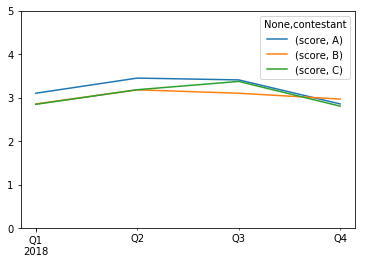

In [17]:
result_df.unstack(level=0).plot(ylim=(0, 5))

## Alternative implementation

In [24]:
data = {'date': rng, 'contestant' :  np.random.choice(['A', 'B', 'C'], len(rng)), 'score' :  np.random.choice(range(1, 6), len(rng))}
df = pd.DataFrame(data)
df.head()

,contestant,date,score
0,C,2018-01-01,4
1,A,2018-01-02,5
2,B,2018-01-03,1
3,C,2018-01-04,3
4,A,2018-01-05,4


### create MultiIndex in one go, no need for an extra groupby()

In [25]:
df = df.set_index(['contestant', 'date']).sort_index()
df.head()

score
contestant date             
A          2018-01-02      5
           2018-01-05      4
           2018-01-07      2
           2018-01-10      1
           2018-01-12      4

In [26]:
len(df)

365

### note that the DateTimeIndex is level=1 in the MultiIndex

In [27]:
df.index.levels[1]

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

### as we have a MultiIndex, we must tell the level we want to use in the groupby and resample

In [28]:
result_df = df.groupby(level=0).resample('Q', level=1).mean()
result_df.head()

score
contestant date                
A          2018-03-31  2.966667
           2018-06-30  3.076923
           2018-09-30  2.869565
           2018-12-31  3.071429
B          2018-03-31  2.935484

In [31]:
df.loc[pd.IndexSlice[['A', 'C'], :]].head()

score
contestant date             
A          2018-01-02      5
           2018-01-05      4
           2018-01-07      2
           2018-01-10      1
           2018-01-12      4